In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def convert_data_frame(data):
    data_dict = {}
    for index, row in data.iterrows():
        now_index = row["num_vertices"], row["num_edges"]
        if now_index not in data_dict:
            data_dict[now_index] = []
        data_dict[now_index].append(row["compare_count"])
    average_list = []
    for key, value in data_dict.items():
        average_list.append({
            "num_vertices": key[0],
            "num_edges": key[1],
            "average": sum(value) / len(value)
        })
    average_data = pd.DataFrame.from_dict(average_list, orient="columns")
    return average_data

In [18]:
def eval_num_vertices(file_name):
    data = pd.read_csv(file_name)
    data = convert_data_frame(data)
    sns.lineplot(x="num_vertices", y="average", data=data)

In [19]:
def eval_num_edges(file_name):
    data = pd.read_csv(file_name)
    data = convert_data_frame(data)
    sns.lineplot(x="num_edges", y="average", data=data)

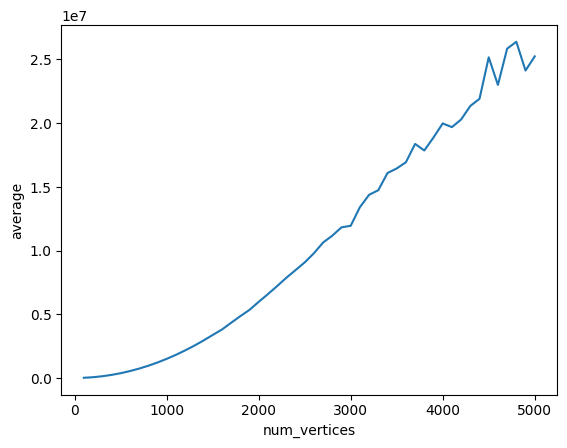

In [20]:
eval_num_vertices("./diff_vertex_matrix.csv")

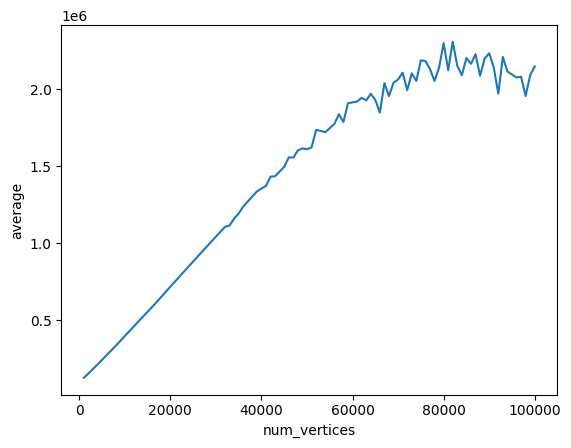

In [21]:
eval_num_vertices("./diff_vertex_list.csv")

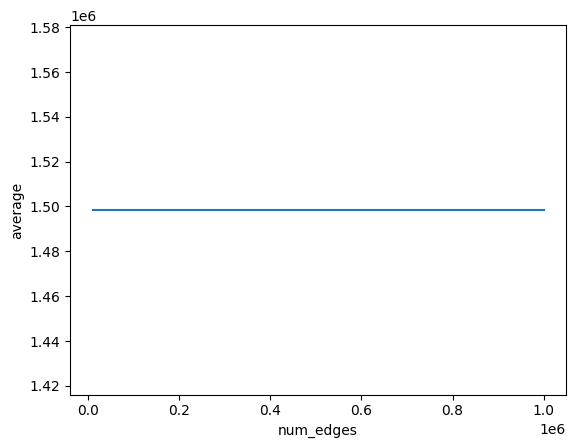

In [22]:
eval_num_edges("./diff_edge_matrix.csv")

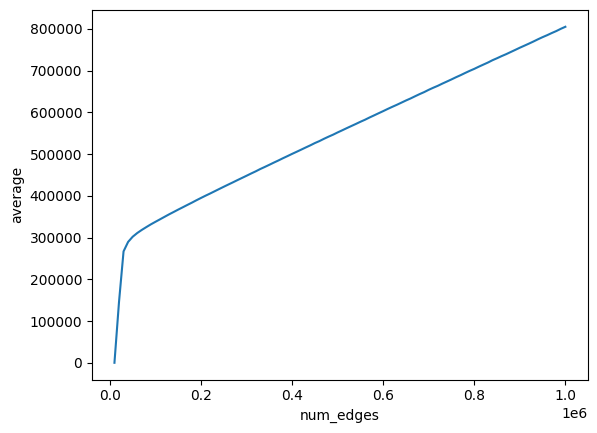

In [23]:
eval_num_edges("./diff_edge_list.csv")